<a href="https://colab.research.google.com/github/jigglypufflazybaby/deep-learning-lab/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow matplotlib scikit-learn pillow

In [3]:
# Import necessary libraries for MNIST
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [4]:
# Load the MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Normalize the MNIST data
X_train_mnist = X_train_mnist / 255.0
X_test_mnist = X_test_mnist / 255.0

In [6]:
# Convert labels to one-hot encoding
y_train_mnist = to_categorical(y_train_mnist, 10)
y_test_mnist = to_categorical(y_test_mnist, 10)

In [7]:
# Print the shape of the MNIST data
print("MNIST Training data shape:", X_train_mnist.shape)
print("MNIST Test data shape:", X_test_mnist.shape)

MNIST Training data shape: (60000, 28, 28)
MNIST Test data shape: (10000, 28, 28)


In [8]:
# Define a Sequential model for MNIST
model_mnist = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for MNIST
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compile the model
model_mnist.compile(optimizer=Adam(learning_rate=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [10]:
# Train the model
history_mnist = model_mnist.fit(X_train_mnist, y_train_mnist,
                                validation_data=(X_test_mnist, y_test_mnist),
                                epochs=20,
                                batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8447 - loss: 0.5317 - val_accuracy: 0.9605 - val_loss: 0.1317
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9578 - loss: 0.1358 - val_accuracy: 0.9700 - val_loss: 0.0956
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.0855 - val_accuracy: 0.9765 - val_loss: 0.0740
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9798 - loss: 0.0670 - val_accuracy: 0.9757 - val_loss: 0.0714
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9837 - loss: 0.0519 - val_accuracy: 0.9788 - val_loss: 0.0686
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9850 - loss: 0.0449 - val_accuracy: 0.9811 - val_loss: 0.0650
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9872 - loss: 0.0389 - val_accuracy: 0.9809 - val_loss: 0.0640
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9883 - loss: 0.0377 - val_accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9787 - loss: 0.0966
MNIST Test Accuracy: 0.9821
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MNIST Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



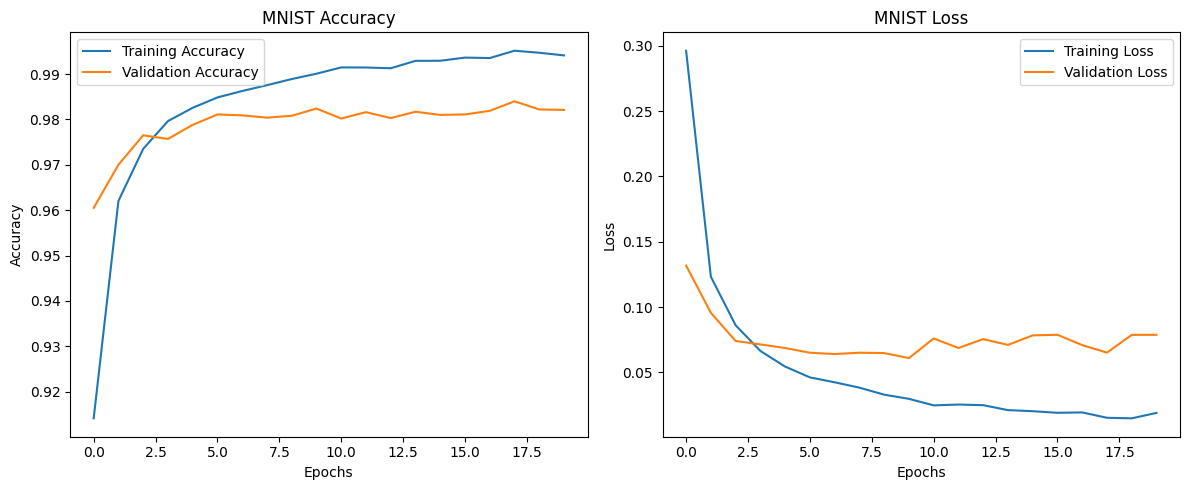

In [12]:
# Evaluate the MNIST model
mnist_test_loss, mnist_test_accuracy = model_mnist.evaluate(X_test_mnist, y_test_mnist)
print(f"MNIST Test Accuracy: {mnist_test_accuracy:.4f}")

# Generate classification report for MNIST
y_pred_mnist = np.argmax(model_mnist.predict(X_test_mnist), axis=1)
y_true_mnist = np.argmax(y_test_mnist, axis=1)
print("MNIST Classification Report:")
print(classification_report(y_true_mnist, y_pred_mnist))

# Plot Accuracy and Loss for MNIST
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mnist.history['accuracy'], label='Training Accuracy')
plt.plot(history_mnist.history['val_accuracy'], label='Validation Accuracy')
plt.title('MNIST Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mnist.history['loss'], label='Training Loss')
plt.plot(history_mnist.history['val_loss'], label='Validation Loss')
plt.title('MNIST Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
